In [1]:
%matplotlib inline

from math import sqrt

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import holtwinters as hw

matplotlib.style.use('ggplot')

In [2]:
bo_open_df = pd.read_csv('./bo_open_ts.csv')
bo_open_df = bo_open_df.loc[
    bo_open_df.year >= 2010
]
bo_open_df.dropna(inplace=True)

#### Look at month resolution.

In [3]:
means_df = bo_open_df.groupby(['year', 'month'], as_index=False).mean()
sums_df = bo_open_df.groupby(['year', 'month'], as_index=False).sum()

bo_means = list(means_df.opening_weekend_gross)
bo_sums = list(sums_df.opening_weekend_gross)

Monthly BO means.

1118016.5643831273


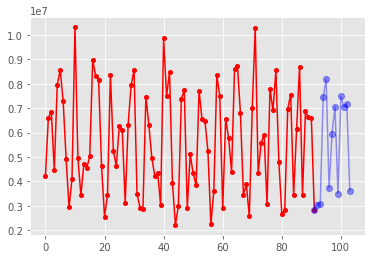

In [4]:
hw_forecast = hw.additive(bo_means, 12, 12)
hw_fc = hw_forecast[0]
rmse = hw_forecast[-1]

print(rmse)

plt.plot(bo_means, color='red', marker='o', markersize=4)
plt.plot([None]*(len(bo_means) - 1) + [bo_means[-1]] + hw_fc, 
         color='blue', marker='o', alpha=.4)

Monthly BO sums.

58460018.65562471


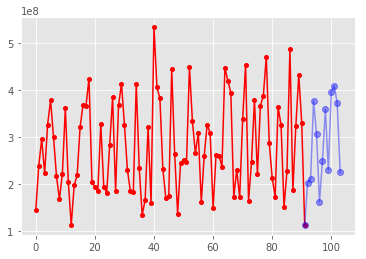

In [5]:
hw_forecast = hw.additive(bo_sums, 12, 12)
hw_fc = hw_forecast[0]
rmse = hw_forecast[-1]

print(rmse)

plt.plot(bo_sums, color='red', marker='o', markersize=4)
plt.plot([None]*(len(bo_sums) - 1) + [bo_sums[-1]] + hw_fc, 
         color='blue', marker='o', alpha=.4)

#### Look at week resolution.

In [6]:
means_df = bo_open_df.groupby(['year', 'week'], as_index=False).mean()
sums_df = bo_open_df.groupby(['year', 'week'], as_index=False).sum()

bo_means = list(means_df.opening_weekend_gross)
bo_sums = list(sums_df.opening_weekend_gross)

Weekly BO means.

4753708.441005396


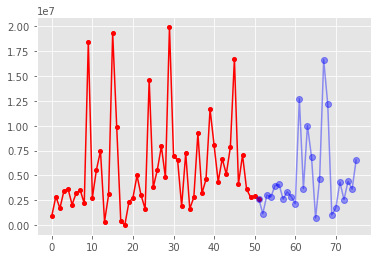

In [7]:
hw_forecast = hw.additive(bo_means, 52, 24)
hw_fc = hw_forecast[0]
rmse = hw_forecast[-1]

print(rmse)

bo_means_trunc = bo_means[-52:]

plt.plot(bo_means_trunc, color='red', marker='o', markersize=4)
plt.plot([None]*(len(bo_means_trunc) - 1) + [bo_means_trunc[-1]] + hw_fc, 
         color='blue', marker='o', alpha=.4)

Weekly BO sums.

37779204.72758782


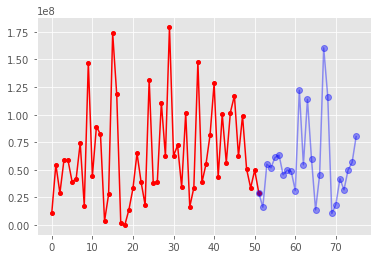

In [8]:
hw_forecast = hw.additive(bo_sums, 52, 24)
hw_fc = hw_forecast[0]
rmse = hw_forecast[-1]

print(rmse)

bo_sums_trunc = bo_sums[-52:]

plt.plot(bo_sums_trunc, color='red', marker='o', markersize=4)
plt.plot([None]*(len(bo_sums_trunc) - 1) + [bo_sums_trunc[-1]] + hw_fc, 
         color='blue', marker='o', alpha=.4)